In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
h = 0.01
x_l, x_r = -1, 1
y_l, y_r = -1, 1
k1 = 10
k2 = 10
lx, ly = np.abs(x_r- x_l), np.abs(y_r - y_l)
Nx, Ny = int(np.round(lx / h)), int(np.round(ly / h))
hx, hy = lx / Nx, ly / Ny

x = np.linspace(x_l + hx / 2, x_r - hx / 2, Nx)
y = np.linspace(y_l + hy / 2, y_r - hy / 2, Ny)

X, Y = np.meshgrid(x, y, indexing="ij")

In [13]:
def f(x, y, k1, k2):
    return - 2 * (k1 ** 2 + 1) * np.cos(2 * k1 * x) + 2 * (k2 ** 2 + 1) * np.cos(2 * k2 * y)

def phi_l(k1, k2):
    return k1 * np.sin(2 * k1)

def phi_r(k1, k2):
    return k1 * np.sin(2 * k1)

def phi_b(k1, k2):
    return -k2 * np.sin(2 * k2)

def phi_t(k1, k2):
    return -k2 * np.sin(2 * k2)

def real_solution(x, y, k1, k2):
    return np.sin(k1 * x + k2 * y) * np.sin(k1 * x - k2 * y)
     

In [14]:
def RHS(X, Y, k1, k2, hx, hy):
    res = f(X, Y, k1, k2)
    res[0, :] += phi_l(k1, k2) / hx
    res[-1, :] += phi_r(k1, k2) / hx
    res[:, 0] += phi_b(k1, k2) / hy
    res[:, -1] += phi_t(k1, k2) / hy
    return res

def L(u, hx, hy):
    res = 4 * u
    res[1:, :] += (u[1:, :] - u[:-1, :]) / hx ** 2
    res[:-1, :] += (u[:-1, :] - u[1:, :]) / hx ** 2
    res[:, 1:] += (u[:, 1:] - u[:, :-1]) / hy ** 2
    res[:, :-1] += (u[:, :-1] - u[:, 1:]) / hy ** 2

    return res


In [15]:
def get_numerical_solution(eps, iter=100000, k1=k1, k2=k2, X=X, Y=Y, hx=hx, hy=hy):
    u = np.zeros_like(X)
    F = RHS(X, Y, k1, k2, hx, hy)

    lambda_min_n = 4
    lambda_max_n = 4 / (hx ** 2) * np.pow(np.sin(np.pi * (Nx - 1) * hx / (2 * lx)), 2) + 4 / (hx ** 2) * np.pow(np.sin(np.pi * (Ny - 1) * hy / (2 * ly)), 2) + 4
    
    tau = 2 / (lambda_min_n + lambda_max_n)
    u_new = u + tau * (F - L(u, hx, hy))
    for _ in range(iter):
        u = u_new
        u_new = u + tau * (F - L(u, hx, hy))
        if np.max(np.abs(u - u_new)) < eps:
            break
    return u

def plot_real_and_numerical_solution(u, X, Y, k1, k2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(u.T, extent=(x_l, x_r, y_l, y_r), cmap='seismic')
    ax[1].imshow(real_solution(X, Y, k1, k2).T, extent=(x_l, x_r, y_l, y_r), cmap='seismic')
    plt.show()
    plt.imshow(np.abs(u.T - real_solution(X, Y, k1, k2).T), extent=(x_l, x_r, y_l, y_r), cmap='seismic')
    plt.colorbar()

In [16]:
u002 = get_numerical_solution(eps=1e-6)

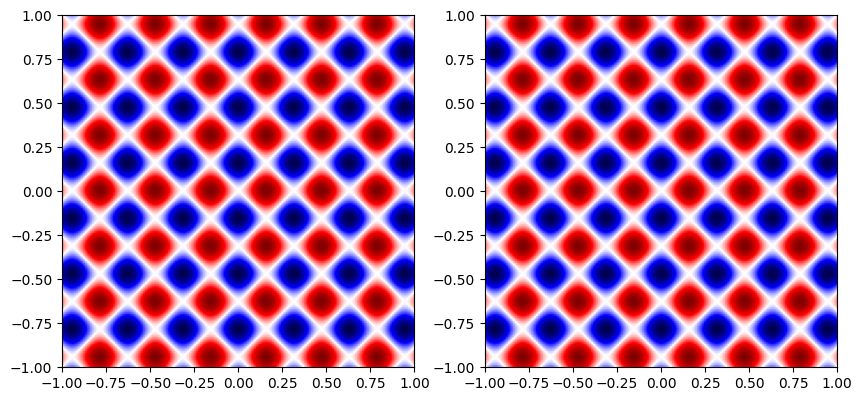

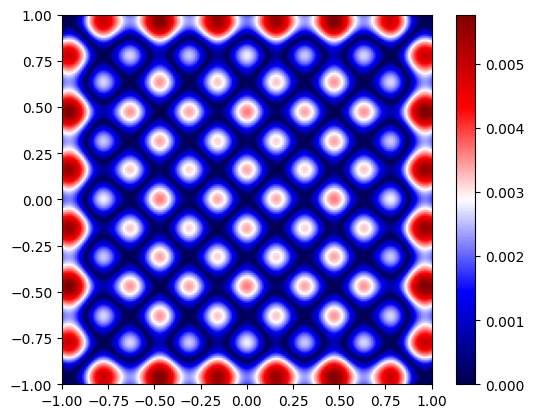

In [17]:
plot_real_and_numerical_solution(u002, X, Y, k1, k2)


In [18]:
# def get_parameters(h):
#     x_l, x_r = -1, 1
#     y_l, y_r = -1, 1
#     lx, ly = np.abs(x_r- x_l), np.abs(y_r - y_l)
#     Nx, Ny = int(np.round(lx / h)), int(np.round(ly / h))
#     hx, hy = lx / Nx, ly / Ny

#     x = np.linspace(x_l + hx / 2, x_r - hx / 2, Nx, endpoint=True)
#     y = np.linspace(y_l + hy / 2, y_r - hy / 2, Ny, endpoint=True)

#     X, Y = np.meshgrid(x, y, indexing="ij")
#     print(hx, hy, X, Y)
#     return X, Y, hx, hy

In [21]:
error = []
iterations = [100, 500, 1000, 10000, 50000, 100000]
for iter in iterations:
    h = 0.01
    x_l, x_r = -1, 1
    y_l, y_r = -1, 1
    lx, ly = np.abs(x_r- x_l), np.abs(y_r - y_l)
    Nx, Ny = int(np.round(lx / h)), int(np.round(ly / h))
    hx, hy = lx / Nx, ly / Ny

    x = np.linspace(x_l + hx / 2, x_r - hx / 2, Nx, endpoint=True)
    y = np.linspace(y_l + hy / 2, y_r - hy / 2, Ny, endpoint=True)

    X, Y = np.meshgrid(x, y, indexing="ij")
    u = get_numerical_solution(1e-6, iter=iter, k1=k1, k2=k2, X=X, Y=Y, hx=hx, hy=hy)
    error.append(np.max(np.abs(u - real_solution(X, Y, k1, k2))))


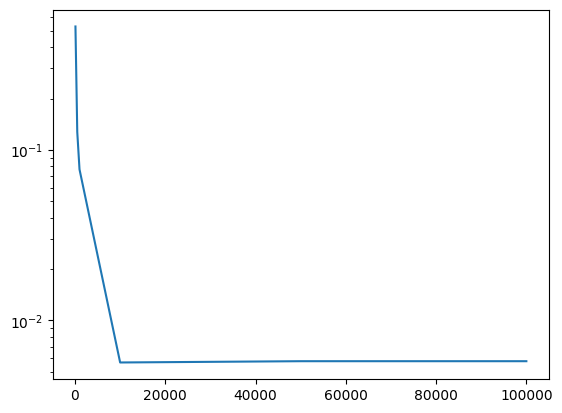

In [24]:
plt.semilogy(iterations, error)